In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [49]:
data = pd.read_csv("C:\\Users\\SHUBHAM\\Downloads\\glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Preprocessing :--

In [53]:
data.rename(columns= { 'RI': 'Refractive_index' ,
                        'Na' : 'Sodium' ,
                       'Mg': 'Magnesium', 
                        'Al' : 'Aluminum',
                        'Si' : 'Silicon' ,
                        'K' : 'Potassium', 
                       'Ca': 'Calcium',
                        'Ba' : 'Barium',
                        'Fe' : 'Iron'}, inplace=True)

## Visualization :--

In [54]:
import seaborn as sn
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Boxplot for Calcium')

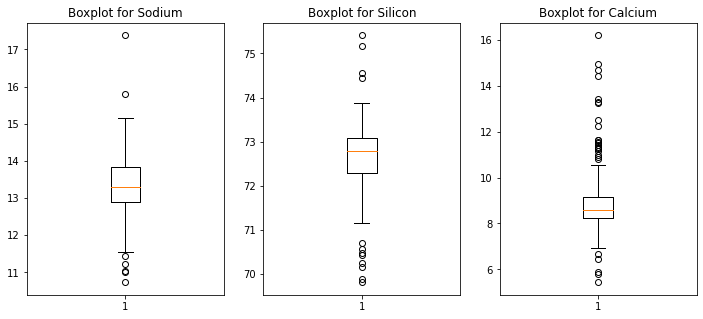

In [57]:
# Boxplot :-

fig , ax =  plt.subplots(1,3, figsize=[12,5])

ax[0].boxplot(data.Sodium)
ax[0].set_title("Boxplot for Sodium")

ax[1].boxplot(data.Silicon)
ax[1].set_title("Boxplot for Silicon")

ax[2].boxplot(data.Calcium)
ax[2].set_title("Boxplot for Calcium")



Text(0.5, 1.0, 'histogram for Iron')

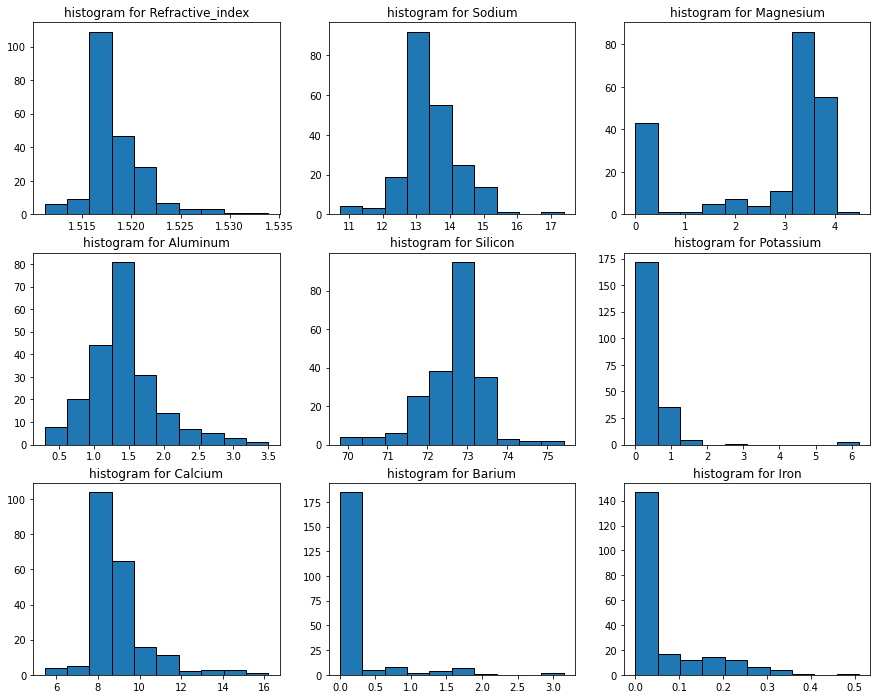

In [60]:
# Histograms plots :--

fig ,ax = plt.subplots(3,3, figsize=[15,12])

ax[0][0].hist(data.Refractive_index, edgecolor='Black')
ax[0][0].set_title("histogram for Refractive_index")

ax[0][1].hist(data.Sodium,edgecolor='Black')
ax[0][1].set_title("histogram for Sodium")

ax[0][2].hist(data.Magnesium,edgecolor='Black')
ax[0][2].set_title("histogram for Magnesium")


ax[1][0].hist(data.Aluminum,edgecolor='Black')
ax[1][0].set_title("histogram for Aluminum")

ax[1][1].hist(data.Silicon,edgecolor='Black')
ax[1][1].set_title("histogram for Silicon")

ax[1][2].hist(data.Potassium,edgecolor='Black')
ax[1][2].set_title("histogram for Potassium")


ax[2][0].hist(data.Calcium,edgecolor='Black')
ax[2][0].set_title("histogram for Calcium")

ax[2][1].hist(data.Barium,edgecolor='Black')
ax[2][1].set_title("histogram for Barium")

ax[2][2].hist(data.Iron,edgecolor='Black')
ax[2][2].set_title("histogram for Iron")


### Lets Scale our data :--

In [61]:
def min_max(i):
    res = (i.min()-i)/(i.max()-i.min())
    return res

In [62]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [63]:
X_scale = min_max(X)

## Train Test Split :-

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.30)

## Model Building :--

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [67]:
k_fold = KFold(n_splits=20)

In [68]:
model = KNeighborsClassifier(n_neighbors=10)

In [74]:
result = cross_val_score(model, X_scale ,Y, cv=k_fold)

In [75]:
result.mean()

0.5468181818181819

### To get the exact value for k-value we will use grid search cv :-

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
k_value = np.array(range(3,31,2))

param_grid = dict (n_neighbors=k_value)
param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])}

In [78]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1)

In [79]:
grid.fit(X_scale,Y)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])})

In [80]:
print(grid.best_score_)
print(grid.best_params_)

0.6311184939091916
{'n_neighbors': 5}


## Hence by doing the hyperparameter our accuarcy has been increased from 54 to 63 .